In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Note that $\Delta E$ can only take on 5 different values based on how many nearest neighbors share a spin with the site:

In [2]:
# Permutation of nearest neighbors doesn't effect sum 
l4 = [1,1,1,1,1] # [site,north,south,east,west]
l3 = [1,1,1,1,-1]
l2 = [1,1,1,-1,-1]
l1 = [1,1,-1,-1,-1]
l0 = [1,-1,-1,-1,-1]
def NN(sites):
    sum = 0.0
    for i in range(len(sites)-1):
        sum += sites[0]*sites[i+1]
    return -1.0*sum

# sn is the value of nearest neighbor sum with n similar nearest neigbors
s4 = NN(l4)
s3 = NN(l3)
s2 = NN(l2)
s1 = NN(l1)
s0 = NN(l0)

# fsn is the change in energy when flipping the spin of a sn state
fs4 = s0-s4
fs3 = s1-s3
fs2 = s2-s2
fs1 = s3-s1
fs0 = s4-s0

print("Shared = 4\t E = ",s4,"\tdE = ",fs4)
print("Shared = 3\t E = ",s3,"\tdE = ",fs3)
print("Shared = 2\t E = ",s2,"\tdE = ",fs2)
print("Shared = 1\t E = ",s1,"\tdE = ",fs1)
print("Shared = 0\t E = ",s0,"\tdE = ",fs0)

Shared = 4	 E =  -4.0 	dE =  8.0
Shared = 3	 E =  -2.0 	dE =  4.0
Shared = 2	 E =  -0.0 	dE =  0.0
Shared = 1	 E =  2.0 	dE =  -4.0
Shared = 0	 E =  4.0 	dE =  -8.0


I used this fact so that I only had to calculate probabilities upon a change in temperature. I then used the pre-evaluated probabilities based on how many of a site's nearest neighbors shared it's value.

## Results

The plots below were made on a $N\times N$ grid that was allowed to equilibriate over $N^4$ iterations, where $N = 50$.

In [3]:
lowtemp = pd.read_csv("LowT.csv",sep=',',header=None).as_matrix()
hitemp = pd.read_csv("HiT.csv",sep=',',header=None).as_matrix()

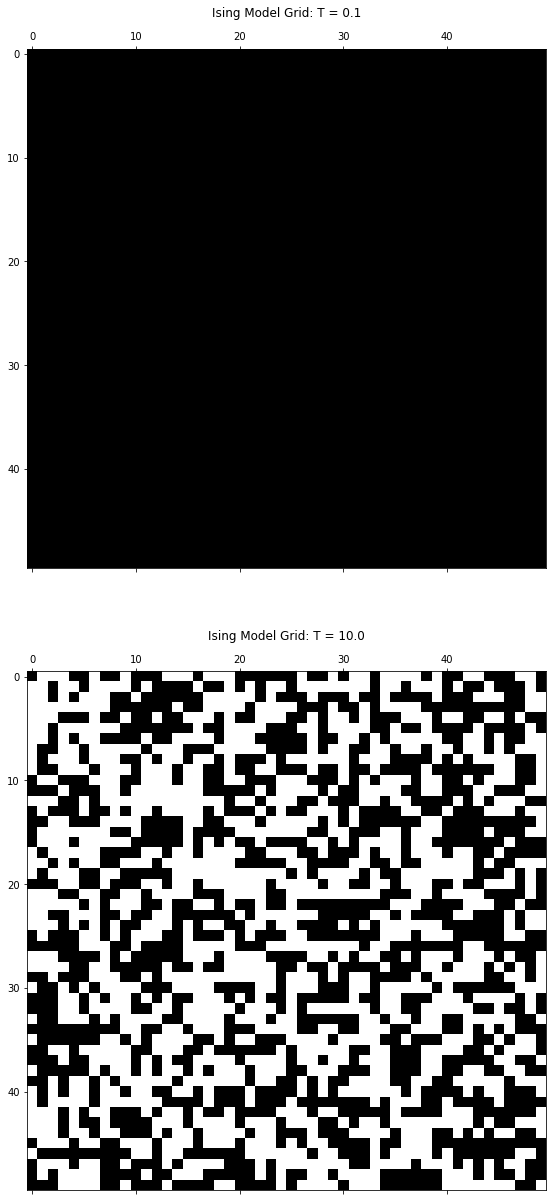

In [4]:
fig,axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,21))
axes[0].matshow(lowtemp,cmap="gray")
axes[0].set_title("Ising Model Grid: T = 0.1")
axes[1].matshow(hitemp,cmap="gray")
axes[1].set_title("Ising Model Grid: T = 10.0")

The plots below show the energy density, magnetization density, specific heat, and magnetic susceptibility as a function of temperature. We see a sharp increase in the energy and magnetization and sharp peaks in the specific heat and magnetic susceptibility at $T\approx 2.1$, indicating the location of the phase change. Note that the "jaggedness" of the plots can be suppressed by allowing more time for the simulation to come to thermal equilibrium.

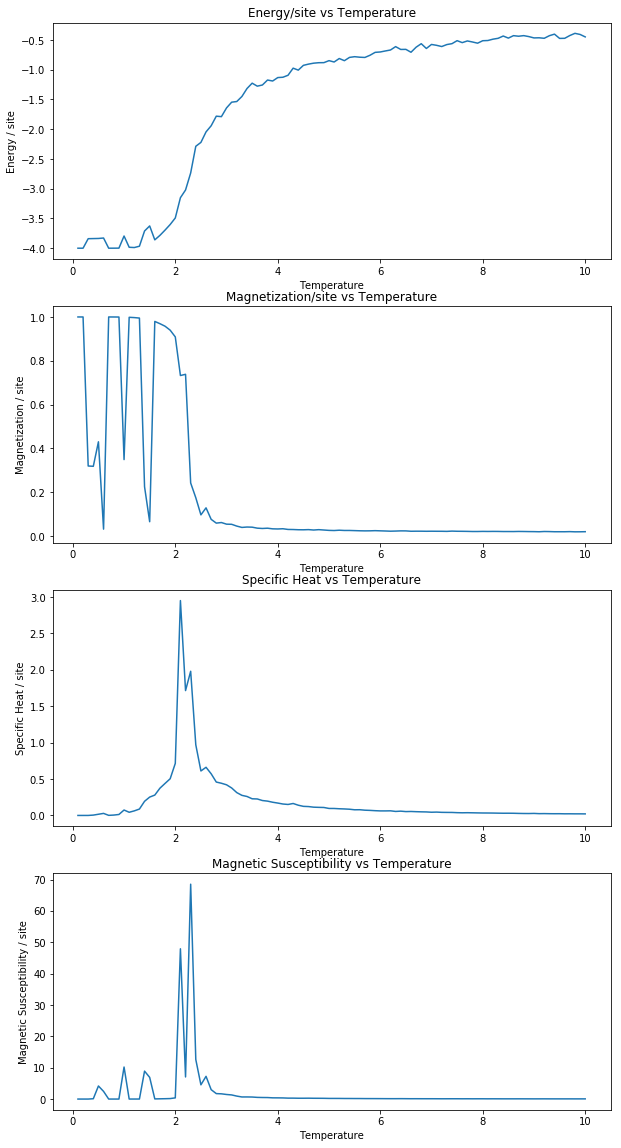

In [5]:
vfig,vaxes = plt.subplots(nrows = 4,ncols = 1,figsize = (10,20))
obs = pd.read_csv("TEM.csv",sep=',',header=None)

vaxes[0].plot(obs[0],obs[1])
vaxes[0].set_title("Energy/site vs Temperature")
vaxes[0].set_xlabel("Temperature")
vaxes[0].set_ylabel("Energy / site")
vaxes[1].plot(obs[0],obs[2])
vaxes[1].set_title("Magnetization/site vs Temperature")
vaxes[1].set_xlabel("Temperature")
vaxes[1].set_ylabel("Magnetization / site")
vaxes[2].plot(obs[0],obs[3])
vaxes[2].set_title("Specific Heat vs Temperature")
vaxes[2].set_xlabel("Temperature")
vaxes[2].set_ylabel("Specific Heat / site")
vaxes[3].plot(obs[0],obs[4])
vaxes[3].set_title("Magnetic Susceptibility vs Temperature")
vaxes[3].set_xlabel("Temperature")
vaxes[3].set_ylabel("Magnetic Susceptibility / site")
